In [14]:
import pandas as pd
import pprint as pp
import matplotlib.pyplot as plt


In [15]:
%cd C:/Users/rishi/Documents/Personal/Learning/Prgming/Python/Python4DS/Datasets
!pwd

C:\Users\rishi\Documents\Personal\Learning\Prgming\Python\Python4DS\Datasets
/c/Users/rishi/Documents/Personal/Learning/Prgming/Python/Python4DS/Datasets


In [16]:
df = pd.read_csv("COVID_all-states-history.csv")

In [17]:
df.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-11-30,AK,A,121.0,121.0,0,NaN,725.0,725.0,162.0,...,1011396.0,5216,NaN,NaN,NaN,NaN,NaN,0,1011396.0,5216
1,2020-11-30,AL,A,3578.0,3246.0,1,332.0,25338.0,25338.0,1717.0,...,1584347.0,4634,NaN,NaN,71698.0,NaN,NaN,0,1584347.0,4634
2,2020-11-30,AR,A+,2502.0,2295.0,32,207.0,8937.0,8937.0,1063.0,...,1683457.0,7629,NaN,21856.0,NaN,136774.0,NaN,0,1683457.0,7629
3,2020-11-30,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-11-30,AZ,A+,6639.0,6152.0,5,487.0,25786.0,25786.0,2513.0,...,2253689.0,17364,364625.0,NaN,NaN,NaN,2253689.0,17364,NaN,0


In [201]:
filtered_df = df[['date','state','death','hospitalized','hospitalizedCumulative','hospitalizedCurrently']]

In [202]:
filtered_df[['date','state']].groupby('state').count().sort_values(by='date').head()

,date
state,
MP,260
VI,260
AS,260
PR,260
GU,260


In [238]:
tx_df = df[['state','date','hospitalizedCurrently']]

In [239]:
tx_df1 = tx_df.dropna()

In [240]:
tx_df2 = tx_df1[tx_df1['state'] == 'TX']

In [241]:
tx_df2

,state,date,hospitalizedCurrently
47,TX,2020-11-30,8900.0
103,TX,2020-11-29,8634.0
159,TX,2020-11-28,8597.0
215,TX,2020-11-27,8518.0
271,TX,2020-11-26,8706.0
...,...,...,...
13487,TX,2020-04-04,196.0
13543,TX,2020-04-03,196.0
13599,TX,2020-04-02,196.0
13655,TX,2020-04-01,196.0


In [257]:
tx_df2.isnull().any()

state                    False
date                     False
hospitalizedCurrently    False
dtype: bool

In [277]:
tx_df3 = tx_df2['date'].str.split('-',n=1,expand = True).rename(columns = {0:'year',1:'month_date'})

In [278]:
tx_df4 = tx_df2.join(tx_df3,lsuffix ='_date')

In [279]:
# tx_df4.describe()
tx_df4.head(3)

,state,date,hospitalizedCurrently,year,month_date
47,TX,2020-11-30,8900.0,2020,11-30
103,TX,2020-11-29,8634.0,2020,11-29
159,TX,2020-11-28,8597.0,2020,11-28


In [302]:
txdf_vis = tx_df4.groupby(['state','month_date'],as_index = False).mean().sort(b)

AttributeError: 'DataFrame' object has no attribute 'sort'

In [296]:
txdf_vis.head(10)

,state,month_date,hospitalizedCurrently
0,TX,03-31,196.0
1,TX,04-01,196.0
2,TX,04-02,196.0
3,TX,04-03,196.0
4,TX,04-04,196.0
5,TX,04-05,827.0
6,TX,04-06,1153.0
7,TX,04-07,1252.0
8,TX,04-08,1491.0
9,TX,04-09,1439.0


In [297]:
txdf_vis.columns

Index(['state', 'month_date', 'hospitalizedCurrently'], dtype='object')

In [298]:
txdf_vis['month_date'].min(), txdf_vis['month_date'].max()

('03-31', '11-30')

Text(0, 0.5, 'hospitalized Currently')

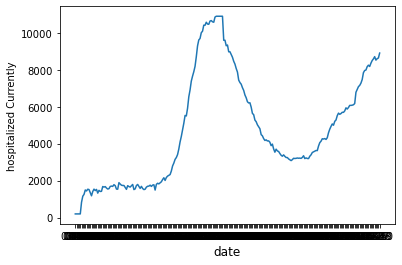

In [301]:
# plt.plot(tx_df['date'],tx_df['hospitalizedCurrently'])
plt.plot(txdf_vis['month_date'],txdf_vis['hospitalizedCurrently'])

plt.xlabel('date',fontsize=12)
plt.ylabel('hospitalized Currently')
